# Imports

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Load Data

In [5]:
dummy_df = pd.read_csv('dummy_df.csv')

In [6]:
dummy_df.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Churn,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,34,56.95,1889.50,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,2,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,2,70.70,151.65,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,8,99.65,820.50,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
4,1,0,22,89.10,1949.40,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0


## Splitting our Data

In [7]:
# Establish target feature, churn
y = dummy_df.Churn.values
# Drop the target feature from remaining features
X = dummy_df.drop('Churn', axis = 1)
# Save dataframe column titles to list, we will need them in next step
cols = X.columns

In [8]:
y

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [9]:
X.head()

,Gender,Senior Citizen,Tenure,Monthly Charges,Total Charges,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,34,56.95,1889.50,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,2,53.85,108.15,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,2,70.70,151.65,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,8,99.65,820.50,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,1,0,22,89.10,1949.40,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0


## Random over-sampling with imblearn

In [10]:
# import library
import collections, numpy
import imblearn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', collections.Counter(y))
print('Resample dataset shape', collections.Counter(y_ros))

Original dataset shape Counter({0: 4316, 1: 1561})
Resample dataset shape Counter({0: 4316, 1: 4316})


## Feature Scaling

In [11]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X2 = pd.DataFrame(mm.fit_transform(X_ros))

In [12]:
X2.shape

(8632, 30)

## Train — Test — Split

In [13]:
from sklearn.model_selection import train_test_split
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_ros, test_size=0.25, random_state=2)

# LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X2_train, y2_train)

LogisticRegression(solver='liblinear')

In [15]:
# predict future values
y2_hat_train = logreg.predict(X2_train)
y2_hat_test = logreg.predict(X2_test)

## Evaluating Model Performance

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix_train = confusion_matrix(y2_train, y2_hat_train)
cnf_matrix_test = confusion_matrix(y2_test, y2_hat_test)

In [17]:
print(cnf_matrix_train)

[[2406  840]
 [ 609 2619]]


In [18]:
print(cnf_matrix_test)

[[776 294]
 [212 876]]


### Classification Report

In [19]:
from sklearn.metrics import classification_report
report_train = classification_report(y2_train, y2_hat_train)
report_test = classification_report(y2_test, y2_hat_test)

In [20]:
print(report_train)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3246
           1       0.76      0.81      0.78      3228

    accuracy                           0.78      6474
   macro avg       0.78      0.78      0.78      6474
weighted avg       0.78      0.78      0.78      6474



In [21]:
print(report_test)

              precision    recall  f1-score   support

           0       0.79      0.73      0.75      1070
           1       0.75      0.81      0.78      1088

    accuracy                           0.77      2158
   macro avg       0.77      0.77      0.77      2158
weighted avg       0.77      0.77      0.77      2158



### AUC - Area Under Curve

In [22]:
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [23]:
# calculate AUC
lr_auc = roc_auc_score(y2_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.839


In [24]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y2_test, lr_probs)

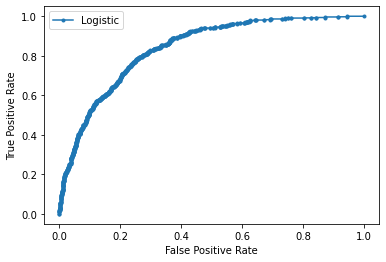

In [25]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(lr_test_fpr, lr_test_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Tune Hyperparameters

In [25]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X2, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.772785 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.772360 (0.017427) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772360 (0.017427) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772399 (0.017383) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.772631 (0.017062) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772670 (0.017097) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772785 (0.017048) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.772091 (0.016898) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.772091 (0.016898) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.772052 (0.016879) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.768886 (0.015576) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768924 (0.015608) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.768770 (0.015532) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.764135 (0.016314) with

## LogisticRegression with best hyperparameters

In [26]:
logreg_best = LogisticRegression(C=10, penalty='l2', solver = 'liblinear')
logreg_best.fit(X2_train, y2_train)

LogisticRegression(C=10, solver='liblinear')

In [27]:
# predict future values
y2_hat_test_best = logreg_best.predict(X2_test)

### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
lr_cnf_matrix_test_best = confusion_matrix(y2_test, y2_hat_test_best)

In [31]:
print(lr_cnf_matrix_test_best)

[[768 302]
 [201 887]]


### Classification Report

In [33]:
lr_report_test_best = classification_report(y2_test, y2_hat_test_best, digits=4)

In [34]:
print(lr_report_test_best)

              precision    recall  f1-score   support

           0     0.7926    0.7178    0.7533      1070
           1     0.7460    0.8153    0.7791      1088

    accuracy                         0.7669      2158
   macro avg     0.7693    0.7665    0.7662      2158
weighted avg     0.7691    0.7669    0.7663      2158



In [35]:
print(report_test)

              precision    recall  f1-score   support

           0       0.79      0.73      0.75      1070
           1       0.75      0.81      0.78      1088

    accuracy                           0.77      2158
   macro avg       0.77      0.77      0.77      2158
weighted avg       0.77      0.77      0.77      2158



### AUC - Area Under Curve

In [36]:
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = logreg.predict_proba(X2_test)
lr_probs_best = logreg_best.predict_proba(X2_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_best = lr_probs_best[:, 1]

In [37]:
# calculate best AUC
lr_auc = roc_auc_score(y2_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.839


In [38]:
# calculate best AUC
lr_auc_best = roc_auc_score(y2_test, lr_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (lr_auc_best))

Logistic: ROC AUC_best=0.840


In [39]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
lr_test_fpr_best, lr_test_tpr_best, lr_test_thresholds_best = roc_curve(y2_test, lr_probs_best)

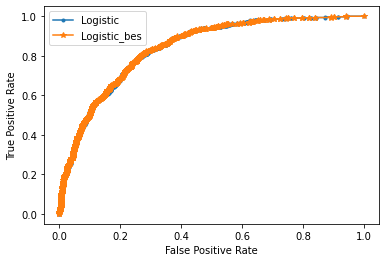

In [40]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(lr_test_fpr, lr_test_tpr, marker='.', label='Logistic')
pyplot.plot(lr_test_fpr_best, lr_test_tpr_best, marker='*', label='Logistic_bes')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# K-Nearest Neighbors (KNN)

In [38]:
# Grid searching the key hyperparameters
from sklearn.neighbors import KNeighborsClassifier
# define dataset
model = KNeighborsClassifier()
n_neighbors = range(1, 7, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X2, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.867355 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.867355 (0.008633) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.867355 (0.008633) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.804023 (0.011703) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.842216 (0.012153) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.774793 (0.012724) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.834918 (0.012940) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.764560 (0.011901) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.831403 (0.014041) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.765062 (0.015885) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.831056 (0.015022) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.768151 (

## K-Nearest Neighbors (KNN) with best hyperparameters

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn_best = KNeighborsClassifier(metric='euclidean' , n_neighbors=1, weights='uniform')
knn_best.fit(X2_train, y2_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [43]:
# predict future values
knn_y_hat_test_best = knn_best.predict(X2_test)

## Confusion Matrix - KNN

In [44]:
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
knn_cnf_matrix_test_best = confusion_matrix(y2_test, knn_y_hat_test_best)

In [45]:
print(knn_cnf_matrix_test_best)

[[ 800  270]
 [  70 1018]]


## Classification Report - KNN

In [46]:
knn_report_test_best = classification_report(y2_test, knn_y_hat_test_best, digits = 4)

In [47]:
print(knn_report_test_best)

              precision    recall  f1-score   support

           0     0.9195    0.7477    0.8247      1070
           1     0.7904    0.9357    0.8569      1088

    accuracy                         0.8424      2158
   macro avg     0.8550    0.8417    0.8408      2158
weighted avg     0.8544    0.8424    0.8410      2158



## AUC - Area Under Curve - KNN

In [48]:
from sklearn.metrics import roc_auc_score
# predict probabilities
knn_probs_best = knn_best.predict_proba(X2_test)
# keep probabilities for the positive outcome only
knn_probs_best = knn_probs_best[:, 1]

In [49]:
# calculate best AUC
knn_auc_best = roc_auc_score(y_test, knn_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (knn_auc_best))

Logistic: ROC AUC_best=0.842


In [50]:
from sklearn.metrics import roc_curve, auc
# Calculate fpr, tpr, and thresholds for test set
knn_test_fpr_best, knn_test_tpr_best, knn_test_thresholds_best = roc_curve(y_test, knn_probs_best)

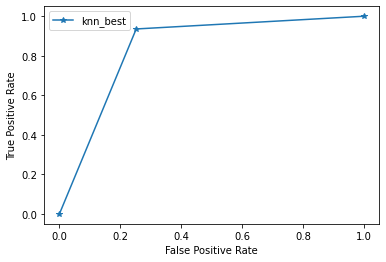

In [51]:
from matplotlib import pyplot
# plot the roc curve for the model
pyplot.plot(knn_test_fpr_best, knn_test_tpr_best, marker='*', label='knn_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.903074 using {'max_features': 'log2', 'n_estimators': 100}
0.900216 (0.012347) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.902649 (0.009895) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.901722 (0.009623) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.897397 (0.012967) with: {'max_features': 'log2', 'n_estimators': 10}
0.903074 (0.009966) with: {'max_features': 'log2', 'n_estimators': 100}
0.902301 (0.009869) with: {'max_features': 'log2', 'n_estimators': 1000}


## Random Forest Classifier with best hyperparameters

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc_best = RandomForestClassifier(max_features='log2', n_estimators= 100)
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_features='log2')

In [98]:
# predict future values
rfc_y_hat_test_best = rfc_best.predict(X_test)

## Confusion Matrix - RFC

In [99]:
# Pass actual test and predicted target test outcomes to function
rfc_cnf_matrix_test_best = confusion_matrix(y_test, rfc_y_hat_test_best)

In [100]:
print(rfc_cnf_matrix_test_best)

[[ 883  187]
 [  55 1033]]


## Classification Report - RFC

In [90]:
rfc_report_test_best = classification_report(y_test, rfc_y_hat_test_best, digits = 4)

In [57]:
print(rfc_report_test_best)

              precision    recall  f1-score   support

           0     0.9370    0.8065    0.8669      1070
           1     0.8327    0.9467    0.8860      1088

    accuracy                         0.8772      2158
   macro avg     0.8848    0.8766    0.8765      2158
weighted avg     0.8844    0.8772    0.8765      2158



In [91]:
print(rfc_report_test_best)

              precision    recall  f1-score   support

           0     0.9379    0.8187    0.8743      1070
           1     0.8415    0.9467    0.8910      1088

    accuracy                         0.8832      2158
   macro avg     0.8897    0.8827    0.8826      2158
weighted avg     0.8893    0.8832    0.8827      2158



In [96]:
print(rfc_report_test_best)

              precision    recall  f1-score   support

           0     0.9379    0.8187    0.8743      1070
           1     0.8415    0.9467    0.8910      1088

    accuracy                         0.8832      2158
   macro avg     0.8897    0.8827    0.8826      2158
weighted avg     0.8893    0.8832    0.8827      2158



In [101]:
print(rfc_report_test_best)

              precision    recall  f1-score   support

           0     0.9379    0.8187    0.8743      1070
           1     0.8415    0.9467    0.8910      1088

    accuracy                         0.8832      2158
   macro avg     0.8897    0.8827    0.8826      2158
weighted avg     0.8893    0.8832    0.8827      2158



## AUC - Area Under Curve - RCF

In [58]:
# predict probabilities
rfc_probs_best = rfc_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs_best = rfc_probs_best[:, 1]

In [59]:
# calculate best AUC
rfc_auc_best = roc_auc_score(y_test, rfc_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (rfc_auc_best))

Logistic: ROC AUC_best=0.959


In [60]:
# Calculate fpr, tpr, and thresholds for test set
rfc_test_fpr_best, rfc_test_tpr_best, rfc_test_thresholds_best = roc_curve(y_test, rfc_probs_best)

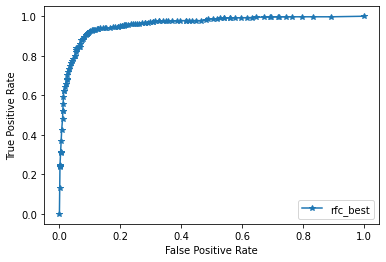

In [61]:
# plot the roc curve for the model
pyplot.plot(rfc_test_fpr_best, rfc_test_tpr_best, marker='*', label='rfc_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Stochastic Gradient Boosting - XGBoost

In [67]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_ros, y_ros)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910218 using {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1.0}
0.767108 (0.013846) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.763130 (0.014648) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.743088 (0.015234) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.768382 (0.013159) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.767919 (0.012688) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.744555 (0.016794) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.775178 (0.014298) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.775371 (0.014758) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.774908 (0.015667) with: {'learning_rate': 0.001, 'm

## Stochastic Gradient Boosting with best hyperparameters

In [81]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
xgb_best = GradientBoostingClassifier(learning_rate=0.1, max_depth=9, n_estimators=1000, subsample= 1.0)
xgb_best.fit(X_train, y_train)

Wall time: 19 s


GradientBoostingClassifier(max_depth=9, n_estimators=1000)

In [82]:
# predict future values
xgb_y_hat_test_best = xgb_best.predict(X_test)

## Confusion Matrix - XGB

In [83]:
# Pass actual test and predicted target test outcomes to function
xgb_cnf_matrix_test_best = confusion_matrix(y_test, xgb_y_hat_test_best)

In [84]:
print(xgb_cnf_matrix_test_best)

[[ 897  173]
 [  59 1029]]


## Classification Report - XGB

In [67]:
xgb_report_test_best = classification_report(y_test, xgb_y_hat_test_best, digits = 4)

In [68]:
print(xgb_report_test_best)

              precision    recall  f1-score   support

           0     0.9387    0.8439    0.8888      1070
           1     0.8604    0.9458    0.9011      1088

    accuracy                         0.8953      2158
   macro avg     0.8995    0.8948    0.8949      2158
weighted avg     0.8992    0.8953    0.8950      2158



In [80]:
print(xgb_report_test_best)

              precision    recall  f1-score   support

           0     0.9387    0.8439    0.8888      1070
           1     0.8604    0.9458    0.9011      1088

    accuracy                         0.8953      2158
   macro avg     0.8995    0.8948    0.8949      2158
weighted avg     0.8992    0.8953    0.8950      2158



In [85]:
print(xgb_report_test_best)

              precision    recall  f1-score   support

           0     0.9387    0.8439    0.8888      1070
           1     0.8604    0.9458    0.9011      1088

    accuracy                         0.8953      2158
   macro avg     0.8995    0.8948    0.8949      2158
weighted avg     0.8992    0.8953    0.8950      2158



In [ ]:
print(xgb_report_test_best)

## AUC - Area Under Curve - XGB

In [69]:
# predict probabilities
xgb_probs_best = xgb_best.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probs_best = xgb_probs_best[:, 1]

In [70]:
# calculate best AUC
xgb_auc_best = roc_auc_score(y_test, xgb_probs_best)
print('Logistic: ROC AUC_best=%.3f' % (xgb_auc_best))

Logistic: ROC AUC_best=0.960


In [71]:
# Calculate fpr, tpr, and thresholds for test set
xgb_test_fpr_best, xgb_test_tpr_best, xgb_test_thresholds_best = roc_curve(y_test, xgb_probs_best)

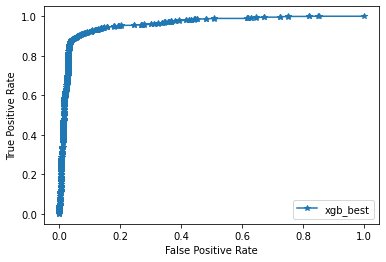

In [72]:
# plot the roc curve for the model
pyplot.plot(xgb_test_fpr_best, xgb_test_tpr_best, marker='*', label='xgb_best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Results of models

## Confusion Matrix

In [102]:
print('Confusion Matrix of the models')
print('\n Logistic Regression:')
print(lr_cnf_matrix_test_best)
print('\n K-Nearest Neighbors:')
print(knn_cnf_matrix_test_best)
print('\n Random Forest Classifier:')
print(rfc_cnf_matrix_test_best)
print('\n XGBoost:')
print(xgb_cnf_matrix_test_best)

Confusion Matrix of the models

 Logistic Regression:
[[768 302]
 [201 887]]

 K-Nearest Neighbors:
[[ 800  270]
 [  70 1018]]

 Random Forest Classifier:
[[ 883  187]
 [  55 1033]]

 XGBoost:
[[ 897  173]
 [  59 1029]]


## Classification Report

In [103]:
print('Classification Report of the models')
print('\n Logistic Regression:')
print(lr_report_test_best)
print('\n K-Nearest Neighbors:')
print(knn_report_test_best)
print('\n Random Forest Classifier:')
print(rfc_report_test_best)
print('\n XGBoost:')
print(xgb_report_test_best)

Classification Report of the models

 Logistic Regression:
              precision    recall  f1-score   support

           0     0.7926    0.7178    0.7533      1070
           1     0.7460    0.8153    0.7791      1088

    accuracy                         0.7669      2158
   macro avg     0.7693    0.7665    0.7662      2158
weighted avg     0.7691    0.7669    0.7663      2158


 K-Nearest Neighbors:
              precision    recall  f1-score   support

           0     0.9195    0.7477    0.8247      1070
           1     0.7904    0.9357    0.8569      1088

    accuracy                         0.8424      2158
   macro avg     0.8550    0.8417    0.8408      2158
weighted avg     0.8544    0.8424    0.8410      2158


 Random Forest Classifier:
              precision    recall  f1-score   support

           0     0.9379    0.8187    0.8743      1070
           1     0.8415    0.9467    0.8910      1088

    accuracy                         0.8832      2158
   macro avg     0

## Area Under Curve

In [104]:
print('Area under curve of the models')
print('\n Logistic Regression:')
print(lr_auc_best)
print('\n K-Nearest Neighbors:')
print(knn_auc_best)
print('\n Random Forest Classifier:')
print(rfc_auc_best)
print('\n XGBoost:')
print(xgb_auc_best)

Area under curve of the models

 Logistic Regression:
0.8397329404892798

 K-Nearest Neighbors:
0.8416626580538757

 Random Forest Classifier:
0.958552089059923

 XGBoost:
0.959980157366685


In [ ]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/